## WeGo Data Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head(20)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN


In [4]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [5]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [6]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [7]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [8]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [9]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [10]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [11]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [12]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


# Q1) What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [13]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [14]:
wego.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,3.503290e+05,350329.000000,3.503290e+05,350329.000000,350329.000000,350329.000000,350329.000000,350329.000000,350318.000000,350329.000000,350329.000000,350329.000000,338861.000000,274738.000000,266062.000000,265893.000000,350329.000000,350329.000000,350329.000000,350329.000000,280000.000000,350329.000000,338858.000000,53102.000000
mean,1.202309e+08,1.298465,1.001038e+08,38.348033,3846.948617,1951.130514,351609.792895,0.006631,7.351284,0.579090,36.158433,-86.769952,-3.188796,18.186021,18.648561,0.518081,0.027902,0.168522,0.770841,0.015263,0.015193,0.011954,2.963915,12.628168
std,5.063417e+01,0.633101,3.227503e+05,20.338342,2042.237357,769.827675,1490.949102,0.097167,4.033002,0.793977,0.059113,0.065548,6.898842,12.261809,14.330568,7.161798,0.164693,0.374329,0.420292,0.122596,0.122320,0.108681,7.402934,6.393862
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-948.533333,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-208.033333,0.000000
25%,1.202308e+08,1.000000,9.989140e+07,22.000000,2211.000000,1391.000000,350900.000000,0.000000,4.000000,0.000000,36.127172,-86.812719,-4.566666,10.000000,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.202308e+08,1.000000,1.001346e+08,50.000000,5006.000000,2012.000000,352001.000000,0.000000,6.000000,0.000000,36.153870,-86.774535,-2.000000,15.000000,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5505.000000,2585.000000,352669.000000,0.000000,10.000000,1.000000,36.179753,-86.726914,-0.333333,20.000000,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.950000,16.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,36.307973,-86.636496,88.383333,503.000000,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,956.500000,118.000000


In [15]:
wego['calender_trip_ID'] = wego['TRIP_ID'].astype(str) + wego['CALENDAR_ID'].astype(str)
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,345104120230801
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,345104120230801
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,345104120230801
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,345104120230801
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,345105120230801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,353448120230930
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,353448120230930
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,353449120230930
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,353449120230930


In [16]:
wego = wego.dropna(subset= ['ADHERENCE','SCHEDULED_HDWY', 'ACTUAL_HDWY' ])
wego = wego[wego['PREV_SCHED_STOP_CANCELLED'] != 1]
wego = wego[wego['STOP_CANCELLED'] != 1]
wego = wego[wego['SCHEDULED_HDWY'] != 0]
wego = wego[wego['SCHEDULED_HDWY'] != 2]
wego.sort_values('ADHERENCE', ascending = True)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID
103162,120230818,1,99963004,2023-08-18,52,5202,1052,352052,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-18 06:15:00,2023-08-18 06:07:02,2023-08-18 22:03:32,-948.533333,15.0,30.583333,15.583333,0,1,0,0,0.0,0,956.500000,8.0,352052120230818
19788,120230804,1,99559760,2023-08-04,22,2211,1743,350239,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-04 07:00:00,2023-08-04 06:48:12,2023-08-04 18:15:00,-675.000000,15.0,8.233333,-6.766667,0,1,0,0,0.0,0,686.800000,5.0,350239120230804
340625,120230929,1,100377605,2023-09-29,23,2312,1394,350478,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-29 05:37:00,2023-09-29 05:59:30,2023-09-29 15:55:10,-618.166666,12.0,13.683333,1.683333,0,1,0,0,0.0,0,595.666666,2.0,350478120230929
30377,120230806,3,99601907,2023-08-06,23,2311,2642,350455,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-06 06:00:00,2023-08-06 06:26:26,2023-08-06 15:02:14,-542.233333,20.0,18.716666,-1.283334,0,1,0,0,0.0,0,515.800000,2.0,350455120230806
229460,120230910,3,100599172,2023-09-10,23,2311,2642,350455,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-10 06:00:00,2023-09-10 06:26:36,2023-09-10 14:59:56,-539.933333,20.0,65.200000,45.200000,0,1,0,0,0.0,0,513.333333,2.0,350455120230910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,120230801,1,99465648,2023-08-01,7,700,3144,348432,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 12:16:00,2023-08-01 10:54:15,2023-08-01 10:59:22,76.633333,20.0,20.333333,0.333333,1,0,0,0,0.0,0,5.116666,8.0,348432120230801
6156,120230801,1,99465637,2023-08-01,7,700,3144,348428,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 09:47:00,2023-08-01 08:30:18,2023-08-01 08:30:18,76.700000,18.0,23.316666,5.316666,1,0,0,0,0.0,0,0.000000,NaN,348428120230801
6168,120230801,1,99465649,2023-08-01,7,700,3144,348432,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 12:26:00,2023-08-01 11:07:16,2023-08-01 11:07:16,78.733333,20.0,18.400000,-1.600000,1,0,0,0,0.0,0,0.000000,NaN,348432120230801
6149,120230801,1,99465630,2023-08-01,7,700,3144,348426,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 08:19:00,2023-08-01 06:43:14,2023-08-01 06:54:20,84.666666,20.0,15.933333,-4.066667,1,0,0,0,0.0,0,11.100000,19.0,348426120230801


In [17]:
all_routes = len(wego)
all_routes

261581

In [18]:
on_time_routes = wego['ADJUSTED_ONTIME_COUNT'].sum()
on_time_routes

208330

In [19]:
perc_on_time = (on_time_routes / all_routes) * 100
perc_on_time

79.64263459502028

In [20]:
early_routes = wego['ADJUSTED_EARLY_COUNT'].sum()
early_routes

8648

In [21]:
perc_early = (early_routes / all_routes) * 100
perc_early

3.306050515901384

In [22]:
late_routes = wego['ADJUSTED_LATE_COUNT'].sum()
late_routes

44603

In [23]:
perc_late = (late_routes / all_routes) * 100
perc_late

17.051314889078334

In [24]:
on_time = (wego['ADHERENCE'] >= -6) & (wego['ADHERENCE'] <= 1)
late = wego['ADHERENCE'] < -6                                    
early = wego['ADHERENCE'] > 1

In [25]:
time_adherence = [on_time, late, early]

In [26]:
time_names = ['On Time', 'Late', 'Early']

In [27]:
wego['early_adherence'] = wego['ADHERENCE'] > 1
wego['late_adherence'] = wego['ADHERENCE'] < -6
wego['on_time_adherence'] = (wego['ADHERENCE'] >= -6) & (wego['ADHERENCE'] <= 1)

In [28]:
wego['time_status'] = np.select(time_adherence, time_names, default='Unknown')
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,early_adherence,late_adherence,on_time_adherence,time_status
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,345106120230801,False,False,True,On Time
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,345107120230801,False,False,True,On Time
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,345107120230801,True,False,False,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,353447120230930,False,False,True,On Time
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,353448120230930,False,True,False,Late
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,353448120230930,False,True,False,Late
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,353449120230930,False,False,True,On Time


In [29]:
time_counts = wego['time_status'].value_counts()
time_counts

time_status
On Time    208330
Late        44603
Early        8648
Name: count, dtype: int64

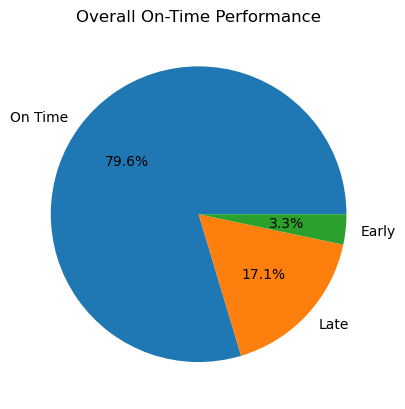

In [30]:
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%')
plt.title('Overall On-Time Performance')
plt.savefig('pie_chart_adherence')

In [31]:
wego_trim = wego[(wego['ADHERENCE'] >= -50) & (wego['ADHERENCE'] <= 50)]
wego_trim

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,early_adherence,late_adherence,on_time_adherence,time_status
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,345106120230801,False,False,True,On Time
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,345107120230801,False,False,True,On Time
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,345107120230801,True,False,False,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,353447120230930,False,False,True,On Time
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,353448120230930,False,True,False,Late
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,353448120230930,False,True,False,Late
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,353449120230930,False,False,True,On Time


In [32]:
wego_trim['hdwy_perc'] = (wego_trim['HDWY_DEV'] / wego_trim['SCHEDULED_HDWY']) * 100
wego_trim

C:\Users\berat\AppData\Local\Temp\ipykernel_1784\1881732353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_trim['hdwy_perc'] = (wego_trim['HDWY_DEV'] / wego_trim['SCHEDULED_HDWY']) * 100


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,early_adherence,late_adherence,on_time_adherence,time_status,hdwy_perc
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,345106120230801,False,False,True,On Time,7.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time,5.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time,-3.222227
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,345107120230801,False,False,True,On Time,-14.444447
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,345107120230801,True,False,False,Early,-25.888893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,353447120230930,False,False,True,On Time,22.388887
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,353448120230930,False,True,False,Late,16.388887
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,353448120230930,False,True,False,Late,17.555553
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,353449120230930,False,False,True,On Time,6.222220


C:\Users\berat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


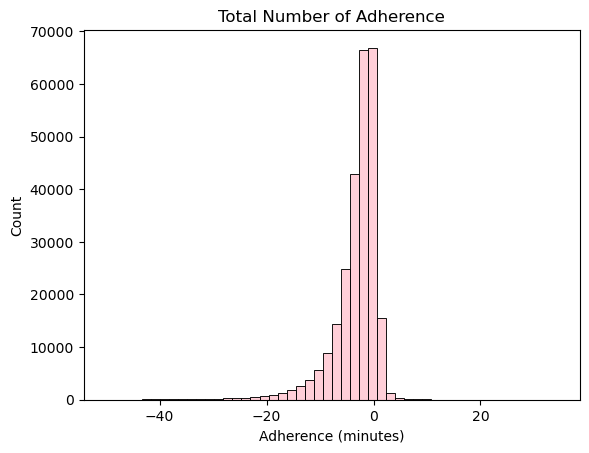

In [33]:
sns.histplot(wego_trim['ADHERENCE'], bins=50, color='pink')
plt.title('Total Number of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Count')
plt.savefig('hist_adhere')

In [34]:
wego_trim = wego_trim[(wego_trim['hdwy_perc'] >= -300) & (wego_trim['hdwy_perc'] <= 300)]
wego_trim.sort_values('hdwy_perc', ascending = False)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,early_adherence,late_adherence,on_time_adherence,time_status,hdwy_perc
119439,120230821,1,100037931,2023-08-21,55,5594,572,352732,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,2023-08-21 07:15:00,2023-08-21 07:19:02,2023-08-21 07:19:02,-4.033333,5.0,20.000000,15.000000,0,0,1,0,0.0,0,0.000000,NaN,352732120230821,False,False,True,On Time,300.000000
344005,120230929,1,100382154,2023-09-29,55,5504,2356,352524,0,FROM DOWNTOWN,MXWHARF,6.0,0,36.148839,-86.762710,2023-09-29 16:49:00,2023-09-29 17:22:35,2023-09-29 17:22:35,-33.583333,10.0,39.983333,29.983333,0,1,0,0,0.0,0,0.000000,NaN,352524120230929,False,True,False,Late,299.833330
229378,120230910,3,100599088,2023-09-10,23,2310,2217,350389,0,FROM DOWNTOWN,EDBC,8.0,0,36.231512,-86.780490,2023-09-10 12:01:00,2023-09-10 12:03:16,2023-09-10 12:03:16,-2.266666,25.0,99.950000,74.950000,0,0,1,0,0.0,0,0.000000,NaN,350389120230910,False,False,True,On Time,299.800000
229377,120230910,3,100599087,2023-09-10,23,2310,2217,350389,0,FROM DOWNTOWN,DWMRT,6.0,0,36.244207,-86.760509,2023-09-10 11:52:00,2023-09-10 11:35:05,2023-09-10 11:52:40,-0.666666,25.0,99.883333,74.883333,0,0,1,0,0.0,0,17.583333,NaN,350389120230910,False,False,True,On Time,299.533332
210113,120230906,1,100502920,2023-09-06,55,5509,1352,352675,0,TO DOWNTOWN,MXTHOMP,8.0,0,36.127172,-86.711441,2023-09-06 06:48:00,2023-09-06 07:08:13,2023-09-06 07:08:13,-20.216666,5.0,19.966666,14.966666,0,1,0,0,0.0,0,0.000000,NaN,352675120230906,False,True,False,Late,299.333320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172316,120230830,1,100295878,2023-08-30,55,5506,2125,352608,0,FROM DOWNTOWN,MXTHOMP,8.0,0,36.128164,-86.713199,2023-08-30 09:07:00,2023-08-30 09:22:36,2023-08-30 09:22:36,-15.600000,10.0,0.000000,-10.000000,0,1,0,0,0.0,0,0.000000,NaN,352608120230830,False,True,False,Late,-100.000000
283677,120230919,1,100093479,2023-09-19,55,5500,1815,352316,0,FROM DOWNTOWN,MXDONEL,9.0,0,36.105615,-86.672004,2023-09-19 09:33:00,2023-09-19 09:45:39,2023-09-19 09:45:39,-12.650000,10.0,0.000000,-10.000000,0,1,0,0,0.0,0,0.000000,NaN,352316120230919,False,True,False,Late,-100.000000
12064,120230802,1,99498603,2023-08-02,56,5606,1277,348205,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-02 12:25:00,2023-08-02 12:12:39,2023-08-02 12:36:42,-11.700000,10.0,0.000000,-10.000000,0,1,0,0,0.0,1,24.050000,NaN,348205120230802,False,True,False,Late,-100.000000
216777,120230907,1,100537873,2023-09-07,55,5510,1500,352699,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,2023-09-07 15:29:00,2023-09-07 15:29:39,2023-09-07 15:29:39,-0.650000,10.0,0.000000,-10.000000,0,0,1,0,0.0,0,0.000000,NaN,352699120230907,False,False,True,On Time,-100.000000


C:\Users\berat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


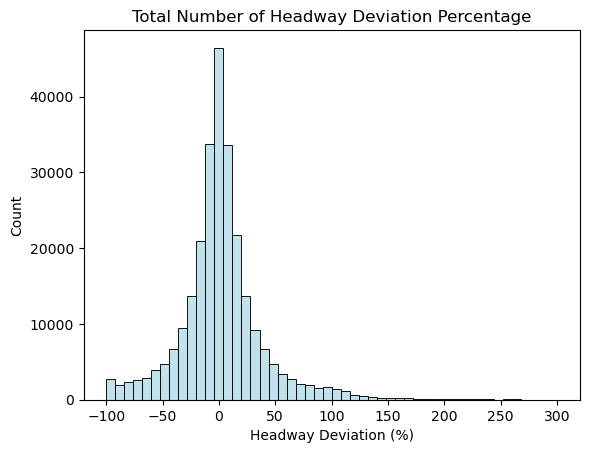

In [35]:
sns.histplot(wego_trim['hdwy_perc'], bins=50, color='lightblue')
plt.title('Total Number of Headway Deviation Percentage')
plt.xlabel('Headway Deviation (%)')
plt.ylabel('Count')
plt.savefig('hist_hdwy')

# 2) How does direction of travel, route, or location affect the headway and on-time performance?


In [36]:
wego['hdwy_perc'] = (wego['HDWY_DEV'] / wego['SCHEDULED_HDWY']) * 100

In [37]:
bunching = wego['bunching'] = wego['hdwy_perc'] < -50
gapping = wego['gapping'] = wego['hdwy_perc'] > 50
acceptable_range = wego['acceptable_range'] = (wego['hdwy_perc'] >= -50) & (wego['hdwy_perc'] <= 50)

In [38]:
hdwy_range = [bunching, gapping, acceptable_range]

In [39]:
range_names = ['bunching', 'gapping', 'acceptable_range']

In [40]:
wego['bunching'] = wego['hdwy_perc'] < -50
wego['gapping'] = wego['hdwy_perc'] > 50
wego['acceptable_range'] = (wego['hdwy_perc'] >= -50) & (wego['hdwy_perc'] <= 50)

In [41]:
wego['hdwy_range_status'] = np.select(hdwy_range, range_names, default = 'Unknown')

In [42]:
range_counts = wego['hdwy_range_status'].value_counts()
range_counts

hdwy_range_status
acceptable_range    223417
gapping              20664
bunching             17500
Name: count, dtype: int64

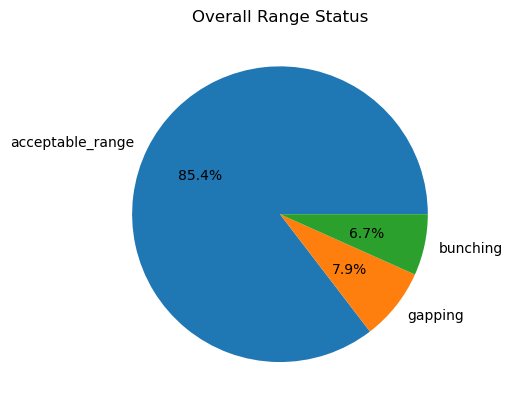

In [43]:
plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%')
plt.title('Overall Range Status')
plt.show()

In [44]:
wego_columns = wego[['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ADHERENCE','time_status', 'hdwy_perc', 'hdwy_range_status']]
wego_columns

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ADHERENCE,time_status,hdwy_perc,hdwy_range_status
7,22,TO DOWNTOWN,MHSP,-1.716666,On Time,7.619046,acceptable_range
8,22,TO DOWNTOWN,ELIZ,-1.916666,On Time,5.619046,acceptable_range
9,22,TO DOWNTOWN,CV23,-0.183333,On Time,-3.222227,acceptable_range
11,22,FROM DOWNTOWN,MCC5_10,-1.316666,On Time,-14.444447,acceptable_range
12,22,FROM DOWNTOWN,CV23,1.500000,Early,-25.888893,acceptable_range
...,...,...,...,...,...,...,...
350320,7,FROM DOWNTOWN,MCC5_9,-5.900000,On Time,22.388887,acceptable_range
350323,7,TO DOWNTOWN,HBHS,-8.616666,Late,16.388887,acceptable_range
350324,7,TO DOWNTOWN,21BK,-8.433333,Late,17.555553,acceptable_range
350326,7,FROM DOWNTOWN,MCC5_9,-4.316666,On Time,6.222220,acceptable_range


In [45]:
wego_time_point = wego.groupby('TIME_POINT_ABBR').agg(avg_adherence = ('ADHERENCE', 'mean'), avg_hdwy_perc = ('hdwy_perc','mean')).reset_index()
wego_time_point.sort_values(by='TIME_POINT_ABBR', ascending = True)

,TIME_POINT_ABBR,avg_adherence,avg_hdwy_perc
0,21BK,-4.235997,2.298183
1,25ACLARK,-0.370186,2.037121
2,28&CHARL,-2.829414,0.810817
3,BRCJ,-3.758990,2.954119
4,CH46,-2.830596,0.860326
5,CLFF,-2.494915,14.092140
6,CV23,-2.056798,2.926997
7,DCSCC,-7.344437,41.325867
8,DKTL,-1.888453,4.662356
9,DWMRT,-2.516453,2.781705


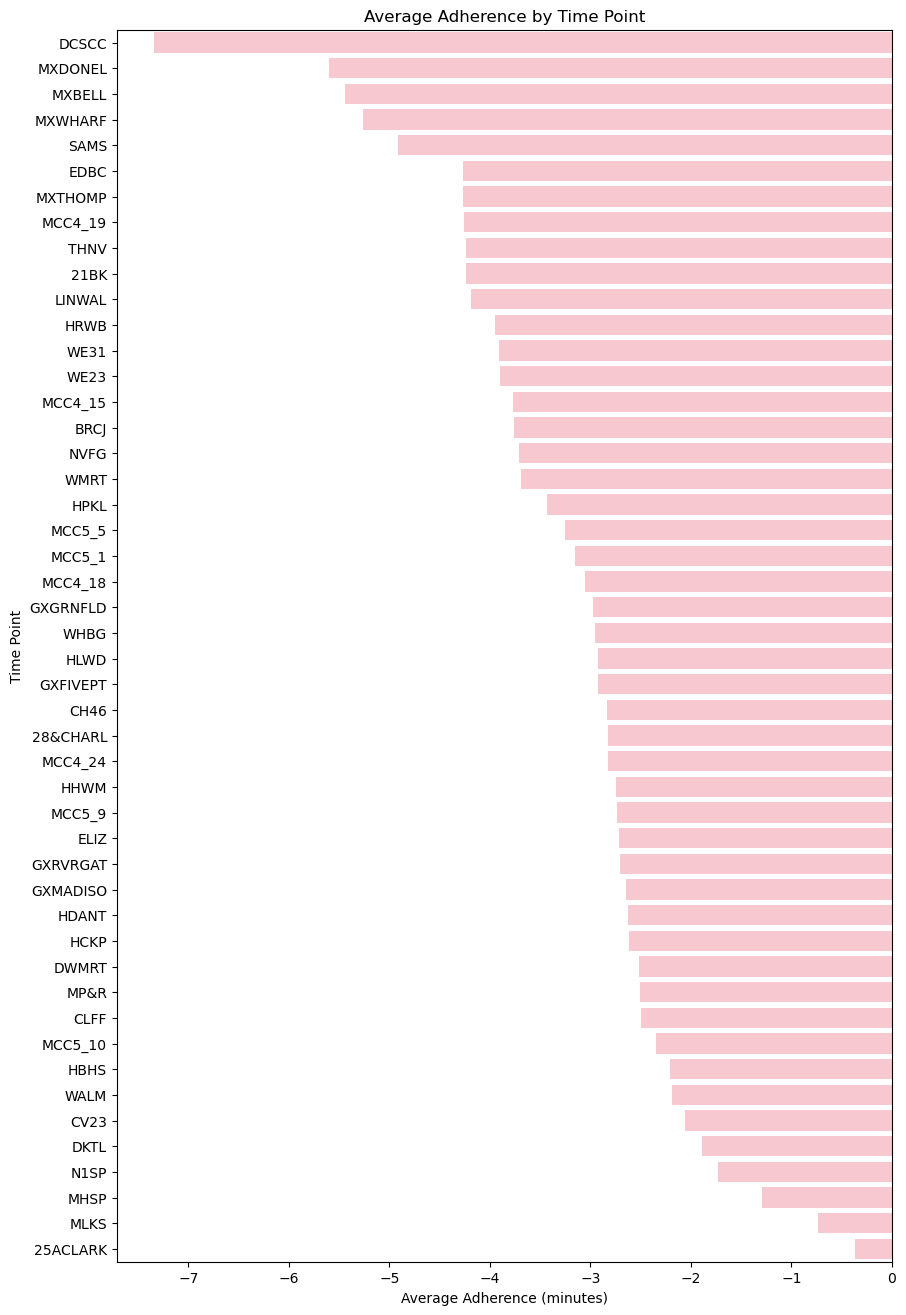

In [46]:
wego_time_point = wego_time_point.sort_values(by='avg_adherence', ascending = True)

plt.figure(figsize=(10, 16))
barplot = sns.barplot(data=wego_time_point, y='TIME_POINT_ABBR', x='avg_adherence', color='pink')
plt.title('Average Adherence by Time Point')
plt.xlabel('Average Adherence (minutes)')
plt.ylabel('Time Point');

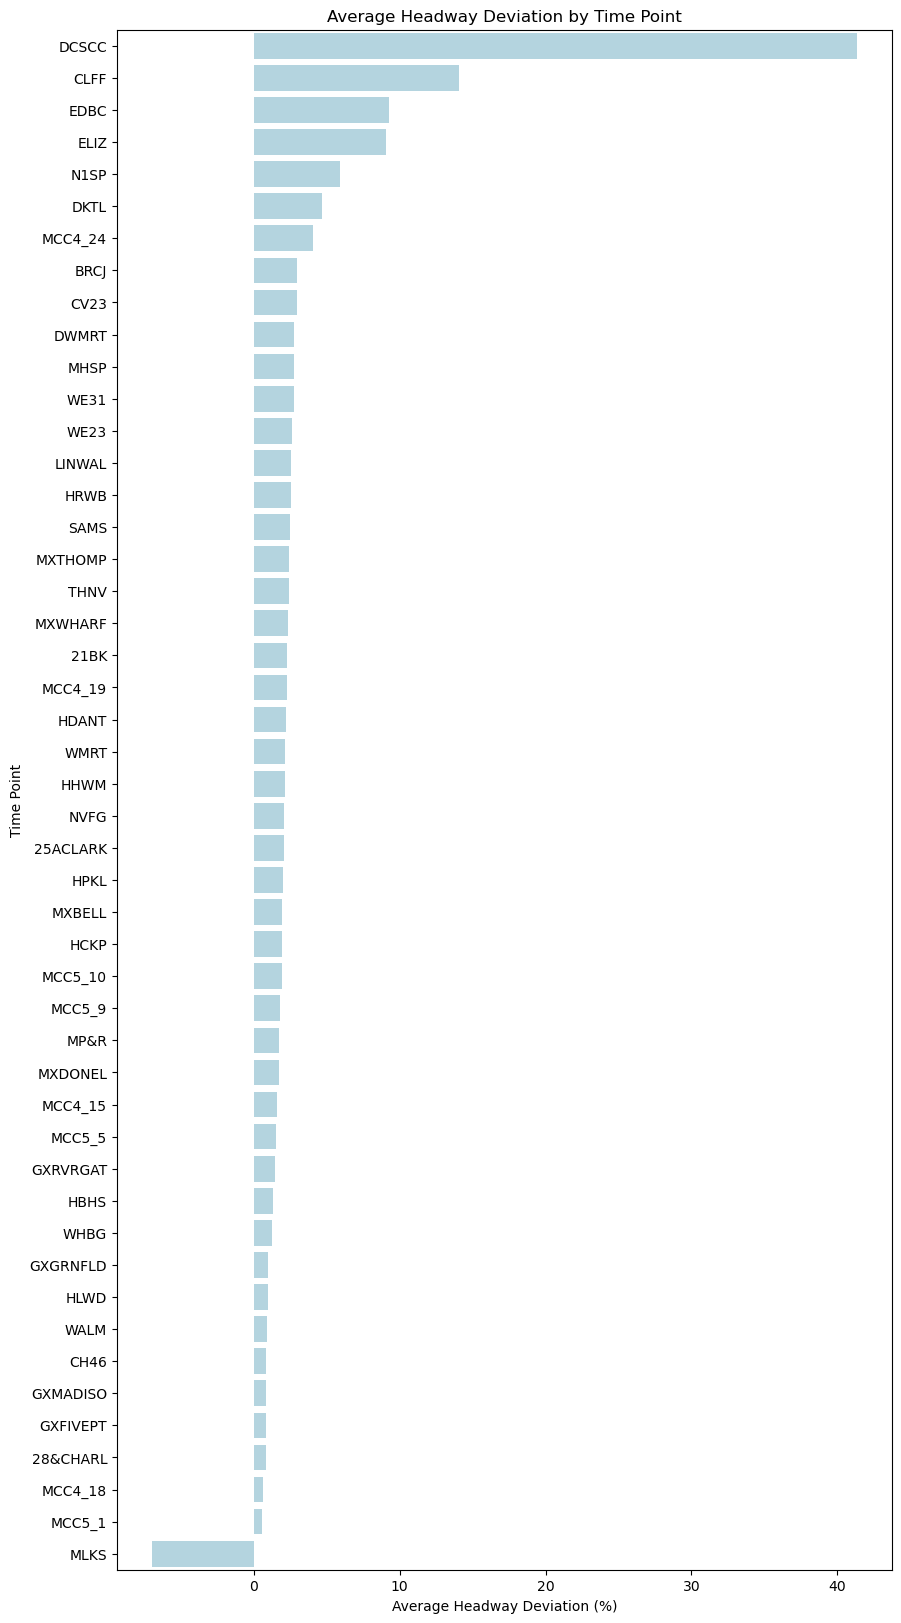

In [47]:
wego_time_point = wego_time_point.sort_values(by='avg_hdwy_perc', ascending = False)

plt.figure(figsize=(10, 20))
sns.barplot(data=wego_time_point, y='TIME_POINT_ABBR', x='avg_hdwy_perc', color='lightblue')
plt.title('Average Headway Deviation by Time Point')
plt.xlabel('Average Headway Deviation (%)')
plt.ylabel('Time Point');

In [48]:
wego_avg_route = wego.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).agg(avg_adherence = ('ADHERENCE', 'mean'), avg_hdwy_perc = ('hdwy_perc','mean'), avg_on_time = ('ADJUSTED_ONTIME_COUNT', 'mean')).reset_index()
wego_avg_route

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,avg_adherence,avg_hdwy_perc,avg_on_time
0,3,FROM DOWNTOWN,-4.724163,2.510900,0.690646
1,3,TO DOWNTOWN,-2.706954,2.463331,0.849522
2,7,FROM DOWNTOWN,-3.994180,2.050302,0.743877
3,7,TO DOWNTOWN,-2.719629,1.784079,0.859721
4,22,FROM DOWNTOWN,-2.595297,4.105739,0.860251
5,22,TO DOWNTOWN,-1.414075,2.612516,0.914551
6,23,FROM DOWNTOWN,-2.561662,4.886387,0.875256
7,23,TO DOWNTOWN,-1.995938,4.896073,0.893499
8,50,FROM DOWNTOWN,-3.152613,0.874078,0.833372
9,50,TO DOWNTOWN,-2.514888,0.822604,0.863838


In [49]:
route_id = {
    '3': 'West End',
    '7': 'Hillsboro',
    '22': 'Bordeaux',
    '23': 'Dickerson Pike',
    '50': 'Charlotte Pike',
    '52': 'Nolensville Pike',
    '55': 'Murfreesboro Pike',
    '56': 'Gallatin Pike'
}
wego_avg_route['ROUTE_ABBR'] = wego_avg_route['ROUTE_ABBR'].astype(str).replace(route_id)
wego_avg_route

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,avg_adherence,avg_hdwy_perc,avg_on_time
0,West End,FROM DOWNTOWN,-4.724163,2.510900,0.690646
1,West End,TO DOWNTOWN,-2.706954,2.463331,0.849522
2,Hillsboro,FROM DOWNTOWN,-3.994180,2.050302,0.743877
3,Hillsboro,TO DOWNTOWN,-2.719629,1.784079,0.859721
4,Bordeaux,FROM DOWNTOWN,-2.595297,4.105739,0.860251
5,Bordeaux,TO DOWNTOWN,-1.414075,2.612516,0.914551
6,Dickerson Pike,FROM DOWNTOWN,-2.561662,4.886387,0.875256
7,Dickerson Pike,TO DOWNTOWN,-1.995938,4.896073,0.893499
8,Charlotte Pike,FROM DOWNTOWN,-3.152613,0.874078,0.833372
9,Charlotte Pike,TO DOWNTOWN,-2.514888,0.822604,0.863838


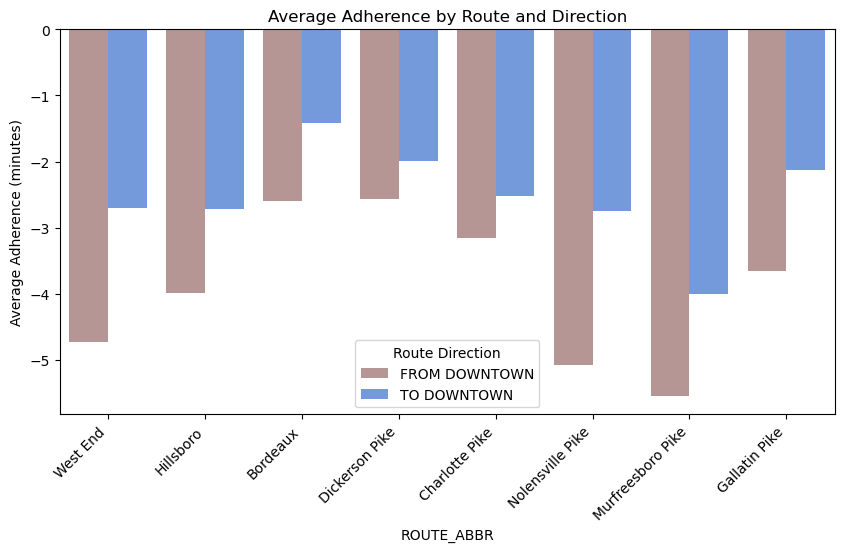

In [50]:
downtown_colors = {"FROM DOWNTOWN": "rosybrown", "TO DOWNTOWN": "cornflowerblue"}

plt.figure(figsize = (10, 5))
sns.barplot(data = wego_avg_route, x = 'ROUTE_ABBR' , y ='avg_adherence', hue ='ROUTE_DIRECTION_NAME', palette = downtown_colors)
plt.title('Average Adherence by Route and Direction')
plt.ylabel('Average Adherence (minutes)')
plt.legend(title ='Route Direction')
plt.xticks(rotation=45, ha="right");

In [51]:
# note: the reason why the bars are descending is because sns.barplot plots negative values below the zero line.

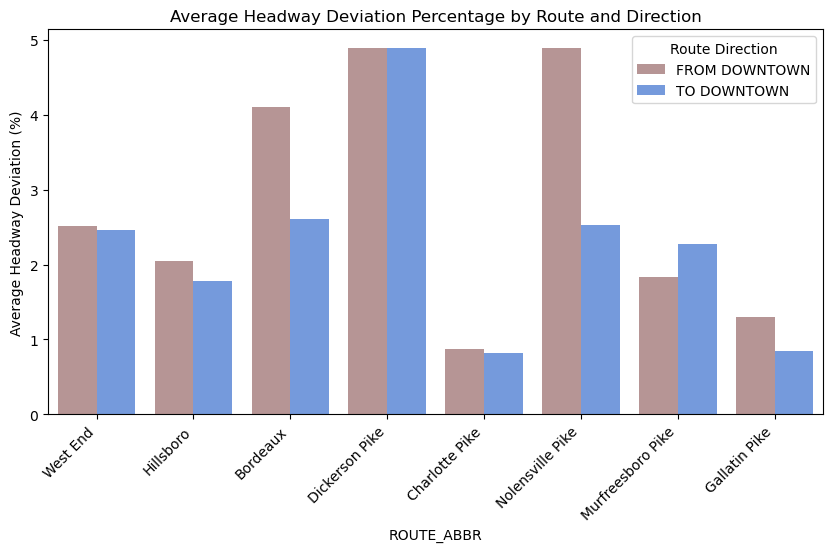

In [52]:
downtown_colors = {"FROM DOWNTOWN": "rosybrown", "TO DOWNTOWN": "cornflowerblue"}


plt.figure(figsize = (10, 5))
sns.barplot(data = wego_avg_route, x ='ROUTE_ABBR', y ='avg_hdwy_perc', hue ='ROUTE_DIRECTION_NAME', palette = downtown_colors)
plt.title('Average Headway Deviation Percentage by Route and Direction')
plt.ylabel('Average Headway Deviation (%)')
plt.legend(title ='Route Direction')
plt.xticks(rotation=45, ha="right");

In [53]:
wego_time_route = wego.groupby(['ROUTE_ABBR', 'ROUTE_DIRECTION_NAME']).agg(on_time = ('ADJUSTED_ONTIME_COUNT', 'sum'), early = ('ADJUSTED_EARLY_COUNT', 'sum'), late = ('ADJUSTED_LATE_COUNT', 'sum'), total = ('time_status', 'count')).reset_index()
wego_time_route

,ROUTE_ABBR,ROUTE_DIRECTION_NAME,on_time,early,late,total
0,3,FROM DOWNTOWN,12279,518,4982,17779
1,3,TO DOWNTOWN,15446,725,2011,18182
2,7,FROM DOWNTOWN,4252,212,1252,5716
3,7,TO DOWNTOWN,4860,124,669,5653
4,22,FROM DOWNTOWN,7670,330,916,8916
5,22,TO DOWNTOWN,6304,245,344,6893
6,23,FROM DOWNTOWN,14503,478,1589,16570
7,23,TO DOWNTOWN,10336,621,611,11568
8,50,FROM DOWNTOWN,14294,490,2368,17152
9,50,TO DOWNTOWN,14801,477,1856,17134


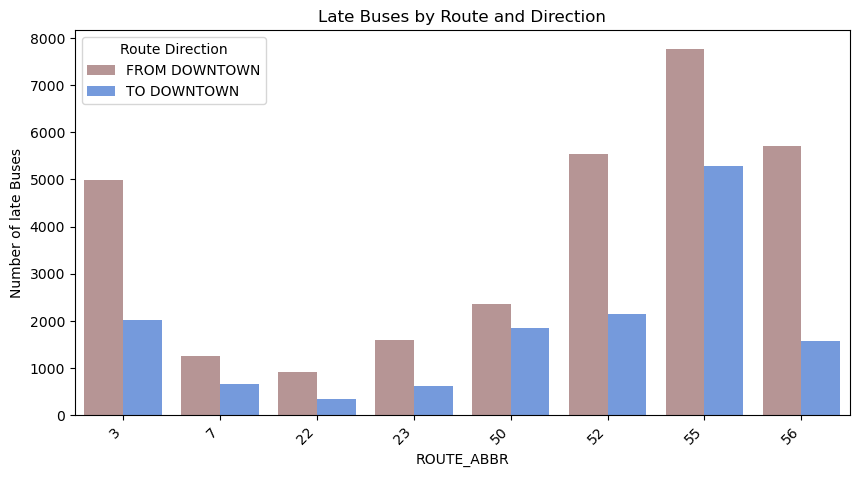

In [54]:
downtown_colors = {"FROM DOWNTOWN": "rosybrown", "TO DOWNTOWN": "cornflowerblue"}

plt.figure(figsize=(10, 5))
sns.barplot(data=wego_time_route, x='ROUTE_ABBR', y='late', hue='ROUTE_DIRECTION_NAME', palette = downtown_colors)
plt.title('Late Buses by Route and Direction')
plt.ylabel('Number of late Buses')
plt.legend(title='Route Direction')
plt.xticks(rotation=45, ha="right");

# Q3 How does time of day or day of week affect headway and on-time performance?


In [55]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,early_adherence,late_adherence,on_time_adherence,time_status,hdwy_perc,bunching,gapping,acceptable_range,hdwy_range_status
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,345106120230801,False,False,True,On Time,7.619046,False,False,True,acceptable_range
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time,5.619046,False,False,True,acceptable_range
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time,-3.222227,False,False,True,acceptable_range
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,345107120230801,False,False,True,On Time,-14.444447,False,False,True,acceptable_range
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,345107120230801,True,False,False,Early,-25.888893,False,False,True,acceptable_range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,353447120230930,False,False,True,On Time,22.388887,False,False,True,acceptable_range
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,353448120230930,False,True,False,Late,16.388887,False,False,True,acceptable_range
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,353448120230930,False,True,False,Late,17.555553,False,False,True,acceptable_range
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,353449120230930,False,False,True,On Time,6.222220,False,False,True,acceptable_range


In [56]:
wego['hour_of_day'] = pd.to_datetime(wego['SCHEDULED_TIME']).dt.hour
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,early_adherence,late_adherence,on_time_adherence,time_status,hdwy_perc,bunching,gapping,acceptable_range,hdwy_range_status,hour_of_day
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,345106120230801,False,False,True,On Time,7.619046,False,False,True,acceptable_range,5
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time,5.619046,False,False,True,acceptable_range,5
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time,-3.222227,False,False,True,acceptable_range,5
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,345107120230801,False,False,True,On Time,-14.444447,False,False,True,acceptable_range,6
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,345107120230801,True,False,False,Early,-25.888893,False,False,True,acceptable_range,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,353447120230930,False,False,True,On Time,22.388887,False,False,True,acceptable_range,21
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,353448120230930,False,True,False,Late,16.388887,False,False,True,acceptable_range,22
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,353448120230930,False,True,False,Late,17.555553,False,False,True,acceptable_range,22
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,353449120230930,False,False,True,On Time,6.222220,False,False,True,acceptable_range,22


In [57]:
grouped_hour = wego.groupby('hour_of_day').agg(avg_adherence = ('ADHERENCE', 'mean'), avg_hdwy_perc = ('hdwy_perc','mean')).reset_index()
grouped_hour

,hour_of_day,avg_adherence,avg_hdwy_perc
0,0,-3.787323,0.499942
1,1,0.142857,-1.587303
2,4,-0.531872,-2.808297
3,5,-1.779422,2.511670
4,6,-2.456713,2.841609
5,7,-3.331704,4.963917
6,8,-3.946010,1.255275
7,9,-2.878067,1.159720
8,10,-2.475318,1.389701
9,11,-2.572455,2.250553


C:\Users\berat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\berat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


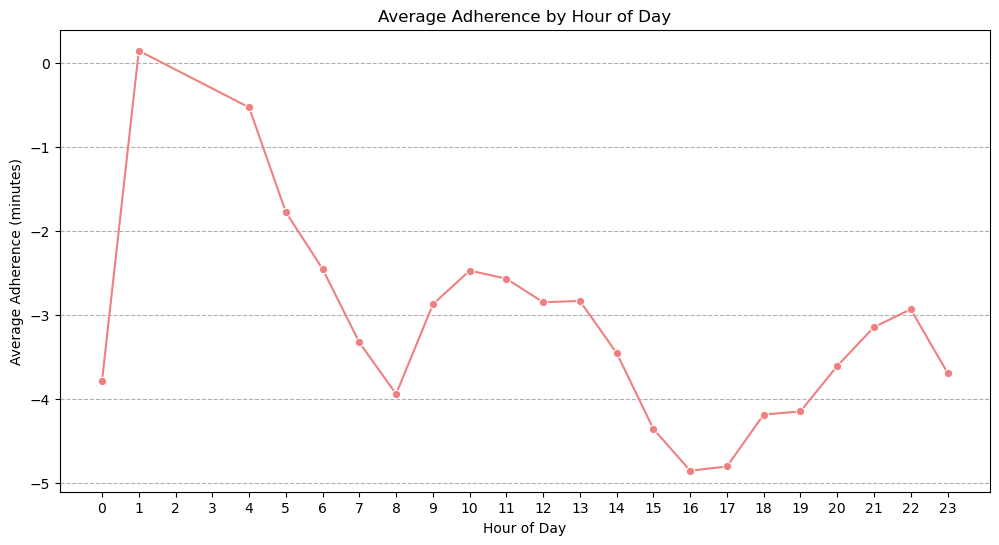

In [58]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_hour, x='hour_of_day', y='avg_adherence', marker='o', color = 'lightcoral')
plt.title('Average Adherence by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Adherence (minutes)')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--')

C:\Users\berat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\berat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


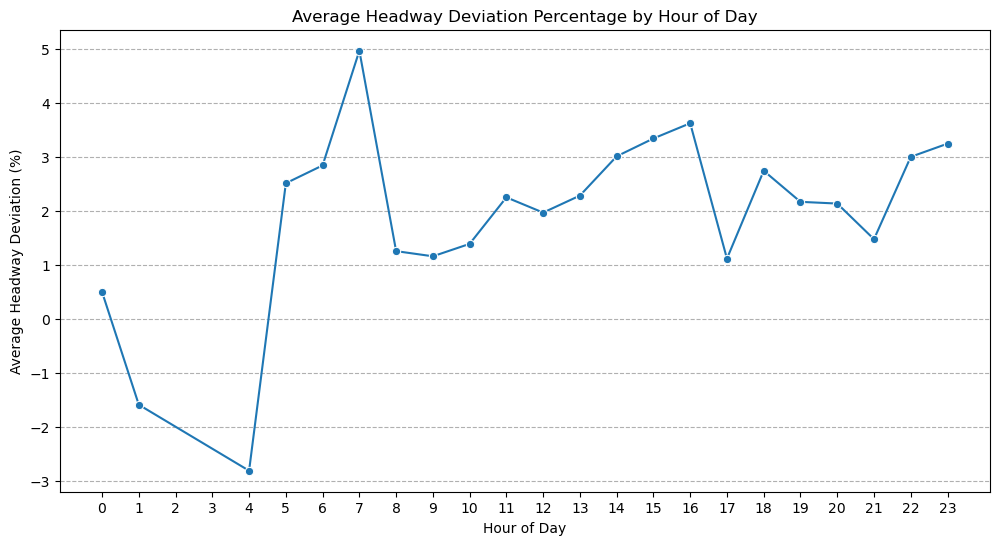

In [59]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_hour, x='hour_of_day', y='avg_hdwy_perc', marker='o')
plt.title('Average Headway Deviation Percentage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Headway Deviation (%)')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--')

# Q4 How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.


In [60]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,early_adherence,late_adherence,on_time_adherence,time_status,hdwy_perc,bunching,gapping,acceptable_range,hdwy_range_status,hour_of_day
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,345106120230801,False,False,True,On Time,7.619046,False,False,True,acceptable_range,5
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time,5.619046,False,False,True,acceptable_range,5
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,345106120230801,False,False,True,On Time,-3.222227,False,False,True,acceptable_range,5
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,345107120230801,False,False,True,On Time,-14.444447,False,False,True,acceptable_range,6
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,345107120230801,True,False,False,Early,-25.888893,False,False,True,acceptable_range,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,353447120230930,False,False,True,On Time,22.388887,False,False,True,acceptable_range,21
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,353448120230930,False,True,False,Late,16.388887,False,False,True,acceptable_range,22
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,353448120230930,False,True,False,Late,17.555553,False,False,True,acceptable_range,22
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,353449120230930,False,False,True,On Time,6.222220,False,False,True,acceptable_range,22


In [61]:
grouped_operator = wego.groupby('OPERATOR').agg(avg_adherence = ('ADHERENCE', 'mean'), avg_hdwy_perc = 
                                                    ('hdwy_perc','mean'), unique_trips = 
                                                    ('calender_trip_ID', 'count')).sort_values('unique_trips', ascending = True)

grouped_operator.reset_index()

,OPERATOR,avg_adherence,avg_hdwy_perc,unique_trips
0,56,-1.391667,-2.500005,2
1,2256,-0.358333,-28.500005,4
2,2377,-3.122222,15.014812,6
3,235,-4.100000,-3.343256,7
4,2313,-3.662500,7.069443,8
...,...,...,...,...
328,332,-3.863108,10.578102,1995
329,2399,-2.924247,-10.507130,2005
330,304,-3.267245,9.801306,2016
331,1133,-1.567563,-2.594570,2156


In [62]:
grouped_operator = grouped_operator[grouped_operator['unique_trips'] > 60].reset_index()
grouped_operator

,OPERATOR,avg_adherence,avg_hdwy_perc,unique_trips
0,2253,-2.826562,-0.498473,64
1,3103,-4.173839,8.752564,79
2,1198,-2.455555,-6.677562,81
3,1922,-7.993775,48.724205,83
4,2178,-1.568452,0.851413,84
...,...,...,...,...
283,332,-3.863108,10.578102,1995
284,2399,-2.924247,-10.507130,2005
285,304,-3.267245,9.801306,2016
286,1133,-1.567563,-2.594570,2156


In [63]:
sort_operator_adherence = grouped_operator.sort_values('avg_adherence', ascending = True)
sort_operator_hdwy = grouped_operator.sort_values('avg_hdwy_perc', ascending = True)

In [64]:
top_10_adherence = sort_operator_adherence.head(10)
bot_10_adherence = sort_operator_adherence.tail(10)
top_10_hdwy = sort_operator_hdwy.head(10)
bot_10_hdwy = sort_operator_hdwy.tail(10)

In [65]:
top_bot_adherence =  pd.concat([top_10_adherence, bot_10_adherence])
top_bot_hdwy =  pd.concat([top_10_hdwy, bot_10_hdwy])

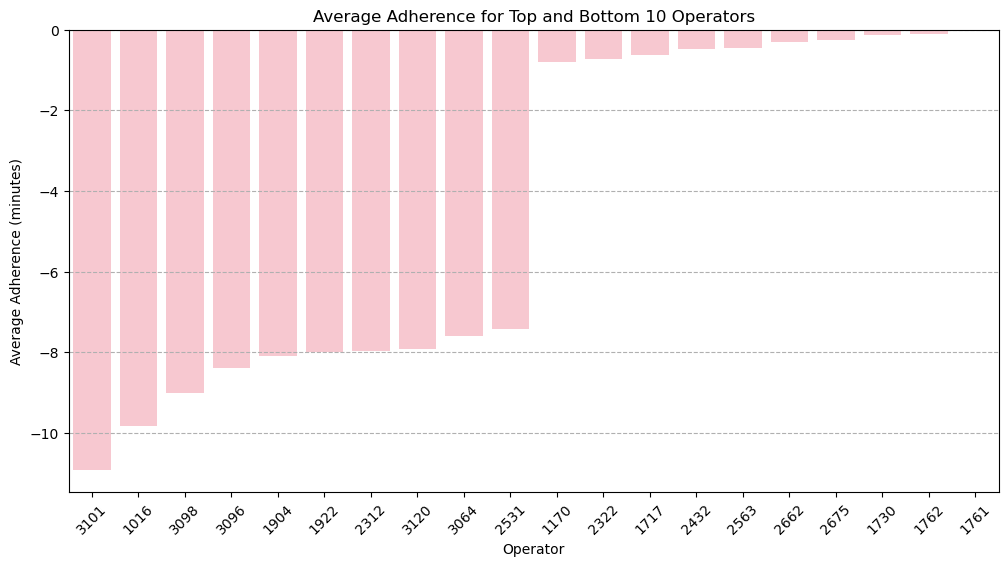

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_bot_adherence, x='OPERATOR', y='avg_adherence', color='pink', order=top_bot_adherence['OPERATOR'])
plt.title('Average Adherence for Top and Bottom 10 Operators')
plt.xlabel('Operator')
plt.ylabel('Average Adherence (minutes)')
plt.xticks(rotation=45)
plt.locator_params(axis='y', nbins=10)
plt.grid(axis='y', linestyle='--')
plt.savefig('q4 adher bar')

In [67]:
avg_on_time = (grouped_operator['avg_adherence'] >= -6) & (grouped_operator['avg_adherence'] <= 1)
avg_late = grouped_operator['avg_adherence'] < -6                                    
avg_early = grouped_operator['avg_adherence'] > 1

avg_time_adherence = [avg_on_time, avg_late, avg_early]

avg_time_names = ['Operators On Time', 'Operators Late', 'Operators Early']

grouped_operator['avg_time_status'] = np.select(avg_time_adherence, avg_time_names, default='Unknown')

avg_time_counts = grouped_operator['avg_time_status'].value_counts()
avg_time_counts

avg_time_status
Operators On Time    260
Operators Late        28
Name: count, dtype: int64

Text(0.5, 1.0, 'Average Overall On-Time Performance')

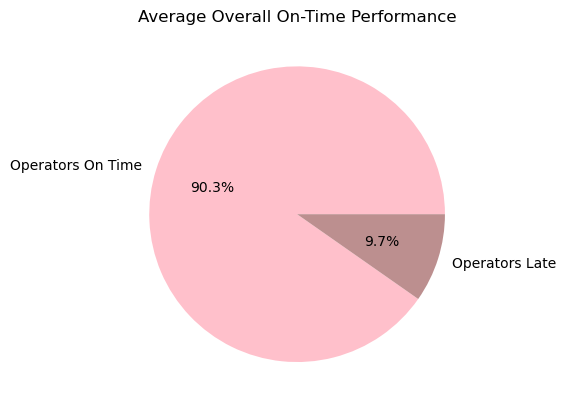

In [68]:
plt.pie(avg_time_counts, labels = avg_time_counts.index, autopct='%1.1f%%', colors = ['pink', 'rosybrown', 'lavenderblush'])
plt.title('Average Overall On-Time Performance')

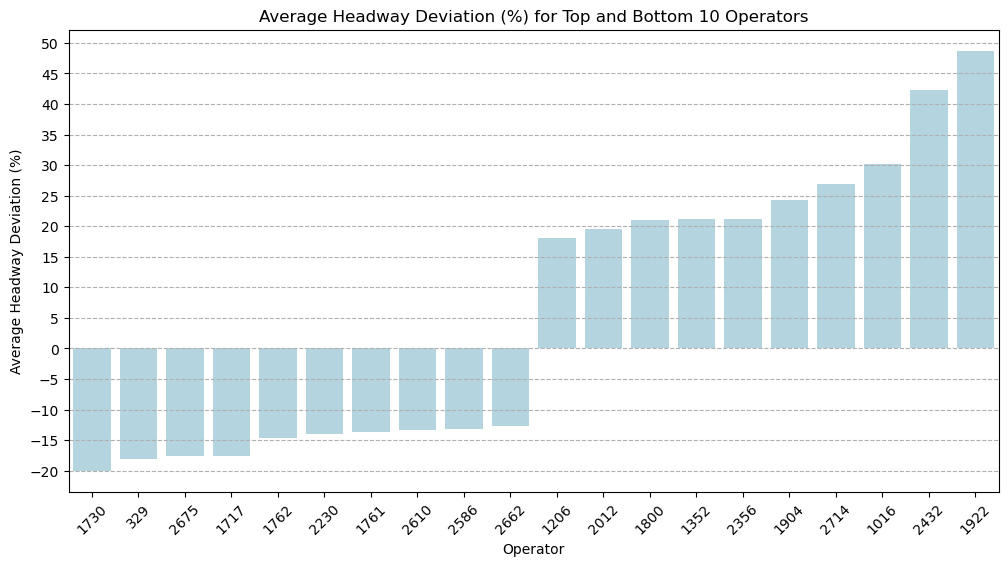

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_bot_hdwy, x='OPERATOR', y='avg_hdwy_perc', color='lightblue', order=top_bot_hdwy['OPERATOR'])
plt.title('Average Headway Deviation (%) for Top and Bottom 10 Operators')
plt.xlabel('Operator')
plt.ylabel('Average Headway Deviation (%)')
plt.xticks(rotation=45)
plt.locator_params(axis='y', nbins=20)
plt.grid(axis='y', linestyle='--')
plt.savefig('q4 hdwy bar')

In [70]:
avg_bunching = grouped_operator['avg_hdwy_perc'] < -50
avg_gapping = grouped_operator['avg_hdwy_perc'] > 50
avg_acceptable_range = (grouped_operator['avg_hdwy_perc'] >= -50) & (grouped_operator['avg_hdwy_perc'] <= 50)

avg_hdwy_range = [avg_bunching, avg_gapping, avg_acceptable_range]

avg_range_names = ['Operators Bunching', 'Operators Gapping', 'Operators Acceptable Range']

grouped_operator['avg_hdwy_range_status'] = np.select(avg_hdwy_range, avg_range_names, default = 'Unknown')

avg_range_counts = grouped_operator['avg_hdwy_range_status'].value_counts()
avg_range_counts

avg_hdwy_range_status
Operators Acceptable Range    288
Name: count, dtype: int64

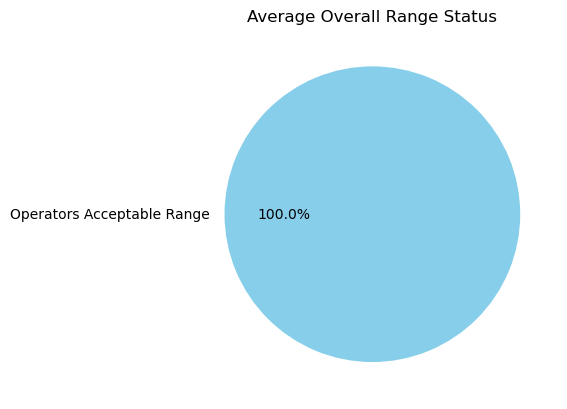

In [71]:
plt.pie(avg_range_counts, labels = avg_range_counts.index, autopct='%1.1f%%', colors = ['skyblue', 'aliceblue'])
plt.title('Average Overall Range Status')
plt.show()

In [72]:
# this is to get the date range

In [73]:
wego.sort_values(['DATE'], ascending = True)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,early_adherence,late_adherence,on_time_adherence,time_status,hdwy_perc,bunching,gapping,acceptable_range,hdwy_range_status,hour_of_day
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,345106120230801,False,False,True,On Time,7.619046,False,False,True,acceptable_range,5
4385,120230801,1,99463457,2023-08-01,55,5505,611,347734,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,2023-08-01 18:36:00,2023-08-01 18:38:08,2023-08-01 18:38:08,-2.133333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,347734120230801,False,False,True,On Time,-3.222227,False,False,True,acceptable_range,18
4384,120230801,1,99463456,2023-08-01,55,5505,611,347734,0,TO DOWNTOWN,MXTHOMP,8.0,0,36.127172,-86.711441,2023-08-01 18:26:00,2023-08-01 18:26:49,2023-08-01 18:26:49,-0.816666,15.0,12.616666,-2.383334,0,0,1,0,0.0,0,0.000000,NaN,347734120230801,False,False,True,On Time,-15.888893,False,False,True,acceptable_range,18
4383,120230801,1,99463455,2023-08-01,55,5505,611,347734,0,TO DOWNTOWN,MXDONEL,9.0,0,36.106276,-86.672801,2023-08-01 18:18:00,2023-08-01 18:21:21,2023-08-01 18:21:21,-3.350000,15.0,12.033333,-2.966667,0,0,1,0,0.0,0,0.000000,NaN,347734120230801,False,False,True,On Time,-19.777780,False,False,True,acceptable_range,18
4382,120230801,1,99463454,2023-08-01,55,5505,611,347734,0,TO DOWNTOWN,MXBELL,10.0,0,36.072852,-86.636862,2023-08-01 18:10:00,2023-08-01 18:12:20,2023-08-01 18:12:20,-2.333333,15.0,11.750000,-3.250000,0,0,1,0,0.0,0,0.000000,NaN,347734120230801,False,False,True,On Time,-21.666667,False,False,True,acceptable_range,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347645,120230930,2,100403675,2023-09-30,50,5000,2440,351670,0,FROM DOWNTOWN,WHBG,15.0,0,36.150052,-86.858652,2023-09-30 19:03:00,2023-09-30 19:07:44,2023-09-30 19:07:44,-4.733333,30.0,32.333333,2.333333,0,0,1,0,0.0,0,0.000000,NaN,351670120230930,False,False,True,On Time,7.777777,False,False,True,acceptable_range,19
347646,120230930,2,100403676,2023-09-30,50,5000,2440,351670,0,FROM DOWNTOWN,HLWD,16.0,0,36.138948,-86.880902,2023-09-30 19:10:00,2023-09-30 19:14:59,2023-09-30 19:14:59,-4.983333,30.0,32.000000,2.000000,0,0,1,0,0.0,0,0.000000,NaN,351670120230930,False,False,True,On Time,6.666667,False,False,True,acceptable_range,19
347648,120230930,2,100403678,2023-09-30,50,5000,2440,351671,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-09-30 19:33:00,2023-09-30 19:19:05,2023-09-30 19:35:52,-2.866666,30.0,29.766666,-0.233334,0,0,1,0,0.0,0,16.783333,16.0,351671120230930,False,False,True,On Time,-0.777780,False,False,True,acceptable_range,19
347621,120230930,2,100403651,2023-09-30,50,5000,2440,351666,0,FROM DOWNTOWN,WHBG,15.0,0,36.150052,-86.858652,2023-09-30 15:53:00,2023-09-30 15:53:19,2023-09-30 15:53:19,-0.316666,20.0,17.850000,-2.150000,0,0,1,0,0.0,0,0.000000,NaN,351666120230930,False,False,True,On Time,-10.750000,False,False,True,acceptable_range,15


In [74]:
# From August 1, 2023, to September 30, 2023, there are 61 days in total

# Q5: Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [75]:
wego_late_adherence = wego[wego['ADHERENCE'] < -6]
wego_late_adherence

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,calender_trip_ID,early_adherence,late_adherence,on_time_adherence,time_status,hdwy_perc,bunching,gapping,acceptable_range,hdwy_range_status,hour_of_day
78,120230801,1,99457968,2023-08-01,22,2200,2689,345127,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 17:14:00,2023-08-01 17:20:10,2023-08-01 17:20:10,-6.166666,12.0,16.683333,4.683333,0,1,0,0,0.0,0,0.000000,NaN,345127120230801,False,True,False,Late,39.027775,False,False,True,acceptable_range,17
83,120230801,1,99457973,2023-08-01,22,2200,2689,345128,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,2023-08-01 18:06:00,2023-08-01 18:13:16,2023-08-01 18:13:16,-7.266666,49.0,45.016666,-3.983334,0,1,0,0,0.0,0,0.000000,NaN,345128120230801,False,True,False,Late,-8.129253,False,False,True,acceptable_range,18
91,120230801,1,99457981,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 19:35:00,2023-08-01 19:19:31,2023-08-01 19:41:31,-6.516666,50.0,54.166666,4.166666,0,1,0,0,0.0,0,22.000000,19.0,345131120230801,False,True,False,Late,8.333332,False,False,True,acceptable_range,19
92,120230801,1,99457982,2023-08-01,22,2200,2689,345131,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 19:44:00,2023-08-01 19:50:44,2023-08-01 19:50:44,-6.733333,25.0,30.816666,5.816666,0,1,0,0,0.0,0,0.000000,NaN,345131120230801,False,True,False,Late,23.266664,False,False,True,acceptable_range,19
94,120230801,1,99457984,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 20:15:00,2023-08-01 20:00:11,2023-08-01 20:22:05,-7.083333,30.0,37.316666,7.316666,0,1,0,0,0.0,0,21.900000,15.0,345132120230801,False,True,False,Late,24.388887,False,False,True,acceptable_range,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350312,120230930,2,100406598,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 20:18:00,2023-09-30 20:24:13,2023-09-30 20:24:13,-6.216666,30.0,35.516666,5.516666,0,1,0,0,0.0,0,0.000000,NaN,353444120230930,False,True,False,Late,18.388887,False,False,True,acceptable_range,20
350318,120230930,2,100406604,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 21:23:00,2023-09-30 21:30:00,2023-09-30 21:30:00,-7.000000,28.0,31.566666,3.566666,0,1,0,0,0.0,0,0.000000,NaN,353446120230930,False,True,False,Late,12.738093,False,False,True,acceptable_range,21
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,353448120230930,False,True,False,Late,16.388887,False,False,True,acceptable_range,22
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,353448120230930,False,True,False,Late,17.555553,False,False,True,acceptable_range,22


Text(0, 0.5, 'Headway Deviation (%)')

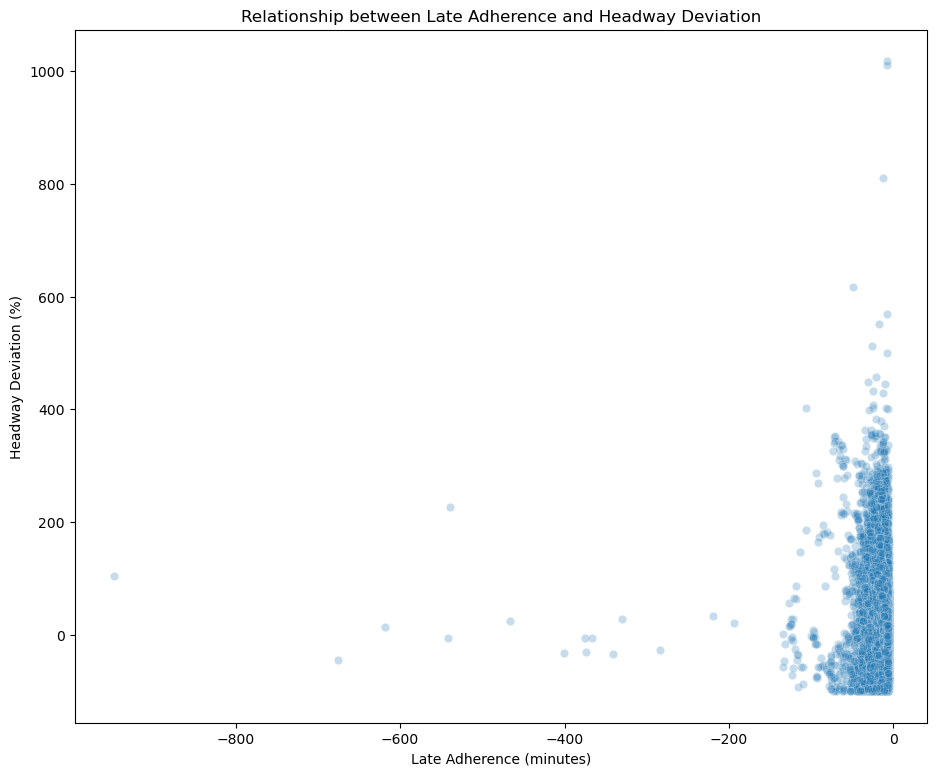

In [76]:
plt.figure(figsize=(11, 9))
sns.scatterplot(data = wego_late_adherence, x = 'ADHERENCE', y = 'hdwy_perc', alpha = 0.25)
plt.title('Relationship between Late Adherence and Headway Deviation')
plt.xlabel('Late Adherence (minutes)')
plt.ylabel('Headway Deviation (%)')

Text(0, 0.5, 'Headway Deviation (%)')

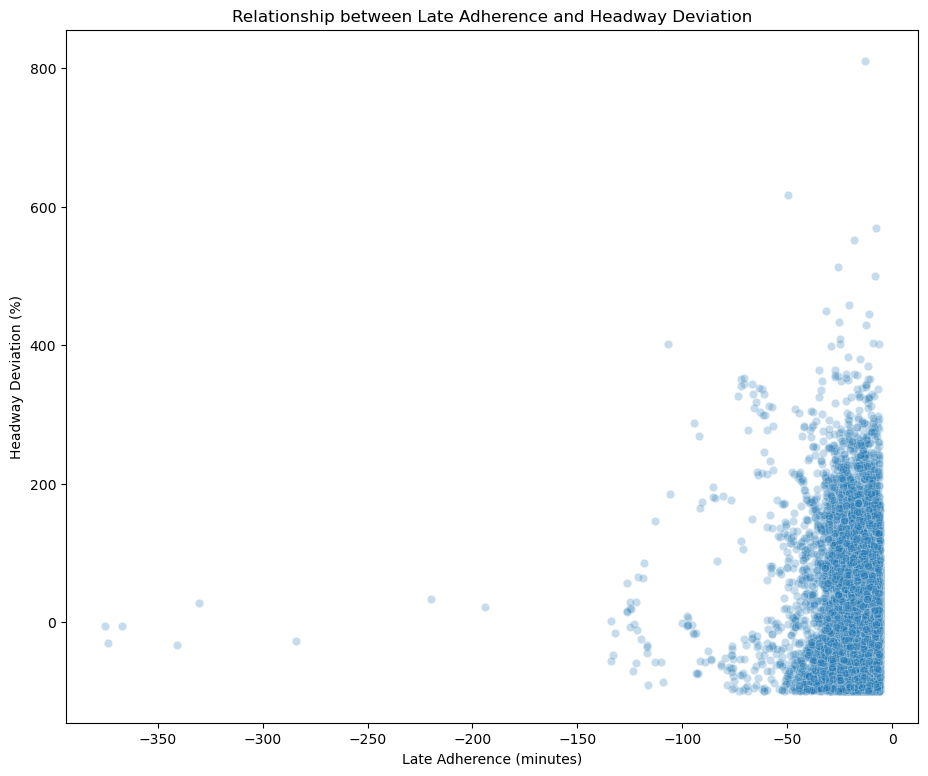

In [77]:
wego_late_adherence_filter = wego_late_adherence[(wego_late_adherence['ADHERENCE'] >= -400) & 
                                                 (wego_late_adherence['hdwy_perc'] <= 1000)]


plt.figure(figsize=(11, 9))
sns.scatterplot(data = wego_late_adherence_filter, x = 'ADHERENCE', y = 'hdwy_perc', alpha = 0.25)
plt.title('Relationship between Late Adherence and Headway Deviation')
plt.xlabel('Late Adherence (minutes)')
plt.ylabel('Headway Deviation (%)')

Text(0, 0.5, 'Headway Deviation (%)')

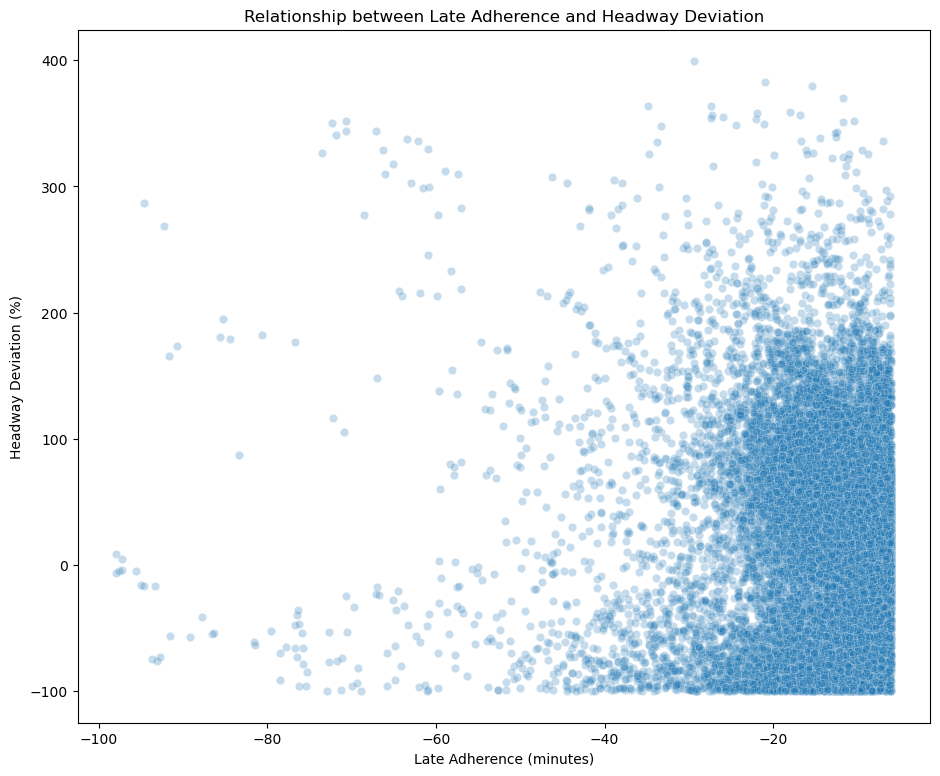

In [78]:
wego_late_adherence_filter_again = wego_late_adherence_filter[(wego_late_adherence_filter['ADHERENCE'] >= -100) & 
                                                              (wego_late_adherence_filter['hdwy_perc'] <= 400)]


plt.figure(figsize=(11, 9))
sns.scatterplot(data = wego_late_adherence_filter_again, x = 'ADHERENCE', y = 'hdwy_perc', alpha = 0.25)
plt.title('Relationship between Late Adherence and Headway Deviation')
plt.xlabel('Late Adherence (minutes)')
plt.ylabel('Headway Deviation (%)')

In [86]:
fig = sns.scatterplot(data=wego_trim, x="ADHERENCE", y="hdwy_perc", hue="time_of_day", alpha = .7)
fig.set(xlabel='Adherence', ylabel='Headway Deviation %', title = 'Performance by Time of Day')

## setting borders and labels white
fig.spines['bottom'].set_color('white')
fig.spines['top'].set_color('white')
fig.xaxis.label.set_color('white')
fig.tick_params(axis='x', colors='white')
fig.yaxis.label.set_color('white')
fig.tick_params(axis='y', colors='white')
fig.title.set_color('white')

plt.ylabel('Headway Deviation Percentage')
plt.title('Peformance by Time of Day')
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.savefig('Time_of_Day.png', transparent = True)

ValueError: Could not interpret value `time_of_day` for parameter `hue`